In [1]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt

# Code paths
import sys
sys.path.append(os.path.split(os.getcwd())[0] + '\\helpers')
sys.path.append(os.path.split(os.getcwd())[0] + '\\associator\\CompTrack')
from file_utils import read_config, read_results

benchmark_root = 'C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\benchmark\\model_3\\all\\associator\\'
associators = ['BoostTrack', 'BoostCompTrack']
hidden_lengths = ['max_hidden_length_3', 'max_hidden_length_30']
metrics = ['num_transfer', 'num_switches', 'num_matches']


{'num_transfer': [[0.05, 0.2, 0.35, 0.5, 0.65], [8.578947368421053, 3.1052631578947367, 0.6842105263157895, 0.0, 0.0]], 'num_switches': [[0.05, 0.2, 0.35, 0.5, 0.65], [138.73684210526315, 214.3684210526316, 328.4736842105263, 463.6842105263158, 592.7894736842105]], 'num_matches': [[0.05, 0.2, 0.35, 0.5, 0.65], [1322.842105263158, 1247.9473684210527, 1135.842105263158, 999.1052631578947, 867.9473684210526]]}
{'num_transfer': [[0.05, 0.2, 0.35, 0.5, 0.65], [19.210526315789473, 9.473684210526315, 2.6315789473684212, 2.0, 1.4210526315789473]], 'num_switches': [[0.05, 0.2, 0.35, 0.5, 0.65], [105.15789473684211, 189.26315789473685, 313.0, 458.42105263157896, 590.7894736842105]], 'num_matches': [[0.05, 0.2, 0.35, 0.5, 0.65], [1353.3684210526317, 1271.421052631579, 1151.6315789473683, 1004.578947368421, 869.8947368421053]]}
{'num_transfer': [[0.05, 0.2, 0.35, 0.5, 0.65], [8.105263157894736, 8.421052631578947, 3.4210526315789473, 2.8421052631578947, 2.6842105263157894]], 'num_switches': [[0.05,

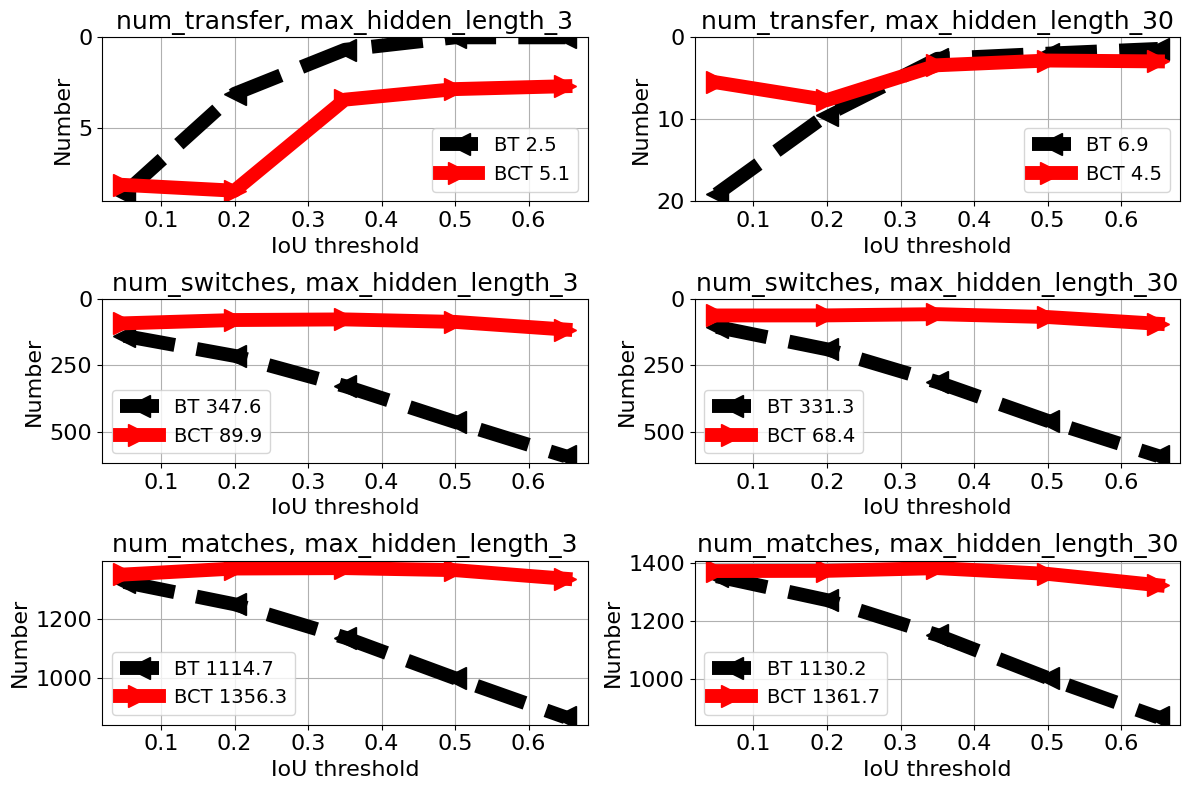

In [2]:
def plot_benchmark_results(benchmark_root, metrics, associators = associators, hidden_lengths = ['max_hidden_length_3, max_hidden_length_30'], eval_type = 'salmon'):
    '''
    Plot results from salmon benchmarking

    Args:
        benchmark_root (str): Root of the benchmarking data
        metrics (list[str]): List of metrics to be plotted
        associators (list[str]): List of associator names to be plotted
        hidden_lengths (list[str]): List of folder names containing data from differen hidden_length settings
    Returns:
        Figure and figure axis of the plotted results
    '''

    associator_hl_roots = {}
    for a in associators:
        associator_root = benchmark_root + '\\' + a + '\\output\\'
        for hl in hidden_lengths:
            associator_hl_roots[a + ',' + hl] = associator_root + hl + '\\'

    if len(hidden_lengths) > 1:
        fig, ax = plt.subplots(len(metrics), len(hidden_lengths), figsize = (len(metrics)*4,len(hidden_lengths)*4))
    else:
        fig, ax = plt.subplots(len(metrics), len(hidden_lengths), figsize = (8,6))
    for k in list(associator_hl_roots.keys()):
        hl = k.split(',')[-1]
        a = k.split(',')[0]
        metrics_dict = {k:[[], []] for k in metrics}

        for analysis_folder in os.listdir(associator_hl_roots[k]):
            config = read_config(associator_hl_roots[k] + analysis_folder + '\\config.yml')
            if eval_type == 'salmon':
                results = read_results(associator_hl_roots[k] + analysis_folder + '\\' + 'motmetrics_evaluation_salmon_results' + '\\salmon_results.txt')
            elif eval_type == 'bp':
                results = read_results(associator_hl_roots[k] + analysis_folder + '\\' + 'motmetrics_evaluation_bp_results' + '\\bp_results.txt')
            
            for m in metrics:
                metrics_dict[m][1].append(float(np.nanmean(results[m])))    
                if 'Boost' in a:
                    metrics_dict[m][0].append(config['trk_det_min_iou_threshold'])  
                else:
                    metrics_dict[m][0].append(config['CompTrack_max_cost'])  

        print(metrics_dict)
        for m, i in zip(metrics_dict, range(len(metrics_dict))):
            if 'Boost' in a:
                color = 'k' if a.startswith('BoostT') else 'r'
                linestyle = '--' if a.startswith('BoostT') else '-'
                marker = '<' if a.startswith('BoostT') else '>'
                a_abb = 'BT' if a.startswith('BoostT') else 'BCT'
                if len(hidden_lengths) > 1:
                    ax[i][hidden_lengths.index(hl)].plot(metrics_dict[m][0], metrics_dict[m][1], linestyle, c = color, label = a_abb + ' ' + str(round(np.average(metrics_dict[m][1]), 1)),  linewidth = 10, marker=marker, markersize = 16)
                else:
                    ax[i].plot(metrics_dict[m][0], metrics_dict[m][1], linestyle, c = color, label = a_abb + ' ' + str(round(np.average(metrics_dict[m][1]), 1)),  linewidth = 10)
            else:
                color = 'g'
                linestyle = '-*'
                if len(hidden_lengths) > 1:
                    ax[i][hidden_lengths.index(hl)].plot([], linestyle, c = color, label = a + ' ' + str(round(np.average(metrics_dict[m][1]), 4)),  linewidth = 10)
                    ax2 = ax[i][hidden_lengths.index(hl)].twiny()
                else:
                    ax[i].plot([], linestyle, c = color, label = a + ' ' + str(round(np.average(metrics_dict[m][1]), 4)),  linewidth = 10)
                    ax2 = ax[i].twiny()
                ax2.plot(metrics_dict[m][0], metrics_dict[m][1], linestyle, c = color)
                ax2.set_xlabel('CompTrack threshold')
                ax2.invert_xaxis()
                ax2.legend()

                
    for m, i in zip(metrics, range(len(metrics))):
        for hl, j in zip(hidden_lengths, range(len(hidden_lengths))):
            if len(hidden_lengths) > 1:
                ax[i][j].set_title(m + ', ' + hl, fontsize = 18)
                if m == 'num_transfer':
                    ax[i][j].legend(fontsize=14)
                else:
                    ax[i][j].legend(fontsize=14)
                ax[i][j].set_xlabel('IoU threshold', fontsize = 16)
                ax[i][j].set_ylabel('Number', fontsize = 16)
                ax[i][j].grid()
                ax[i][j].tick_params(axis='both', which='major', labelsize=16)
                if m in ['num_switches', 'num_transfer']:
                    yl, yh = ax[i][j].get_ylim()
                    ax[i][j].set_ylim(yh,0)
            else:
                ax[i].set_title(m + ', ' + hl, fontsize = 18)
                ax[i].legend(fontsize=16)
                ax[i].set_xlabel('IoU threshold', fontsize = 16)
                ax[i].set_ylabel('Number', fontsize = 16)
                ax[i].tick_params(axis='both', which='major', labelsize=16)
                ax[i].set_ylabel('Event cnt', fontsize = 16)
                ax[i].tick_params(axis='both', which='major', labelsize=16)
                ax[i].grid()
                if m in ['num_switches', 'num_transfer']:
                    yl, yh = ax[i].get_ylim()
                    ax[i].set_ylim(yh,0)

    fig.tight_layout()
    return fig, ax
    
fig, ax = plot_benchmark_results(benchmark_root, metrics = metrics, associators=associators, hidden_lengths=hidden_lengths, eval_type='bp')